#**DATA MINING**

**Klasifikasi Kelulusan Siswa berdasarkan Status Makan Siang dan Faktor Demografis menggunakan Metode Decision Tree**

# **1. DATA COLLECTION & EXPLORATION**

In [4]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [5]:
# Baca dataset
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
# Menampilkan data dalam bentuk tabel
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
# Buat kolom nilai rata-rata
df["average score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

In [8]:
# Menampilkan data dalam bentuk tabel setelah membuat kolom nilai rata-rata
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [9]:
# Buat kolom target "kelulusan" berdasarkan nilai rata-rata >= 60
df["kelulusan"] = df["average score"].apply(lambda x: "Lulus" if x >= 60 else "Tidak Lulus")

In [10]:
# Menampilkan data dalam bentuk tabel setelah membuat kolom kelulusan (sebagai label)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,kelulusan
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Lulus
1,female,group C,some college,standard,completed,69,90,88,82.333333,Lulus
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Lulus
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Tidak Lulus
4,male,group C,some college,standard,none,76,78,75,76.333333,Lulus
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Lulus
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,Tidak Lulus
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,Lulus
998,female,group D,some college,standard,completed,68,78,77,74.333333,Lulus


# **2. DATA PREPROCESSING & TRANSFORMATION**

In [11]:
# Mengubah semua kolom yang berisi teks menjadi angka
label_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
# Encode label target
le_target = LabelEncoder()
df["kelulusan"] = le_target.fit_transform(df["kelulusan"])

In [13]:
# Menampilkan data dalam bentuk tabel setelah melakukan encode
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,kelulusan
0,0,1,1,1,1,72,72,74,72.666667,0
1,0,2,4,1,0,69,90,88,82.333333,0
2,0,1,3,1,1,90,95,93,92.666667,0
3,1,0,0,0,1,47,57,44,49.333333,1
4,1,2,4,1,1,76,78,75,76.333333,0
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.000000,0
996,1,2,2,0,1,62,55,55,57.333333,1
997,0,2,2,0,0,59,71,65,65.000000,0
998,0,3,4,1,0,68,78,77,74.333333,0


In [14]:
# Tentukan fitur dan target
X = df[["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]]
y = df["kelulusan"]

In [15]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model dibuat dengan max_depth=3 agar visualisasi sederhana
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
# Prediksi dan Evaluasi Performa Model
print("\n--- Hasil Evaluasi Model Decision Tree ---")
y_pred = model.predict(X_test) # Membuat prediksi pada data uji

# Menampilkan metrik evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


--- Hasil Evaluasi Model Decision Tree ---
Akurasi: 0.66
Classification Report:
               precision    recall  f1-score   support

       Lulus       0.71      0.87      0.78       138
 Tidak Lulus       0.40      0.19      0.26        62

    accuracy                           0.66       200
   macro avg       0.55      0.53      0.52       200
weighted avg       0.61      0.66      0.62       200



Berdasarkan output yang dihasilkan, akurasi yang ditunjukkan yaitu sebesar 66% yang berarti secara keseluruhan model ini berhasil menebak dengan benar dari total 200 data siswa yang diuji.



# **3. DATA VISUALIZATION**

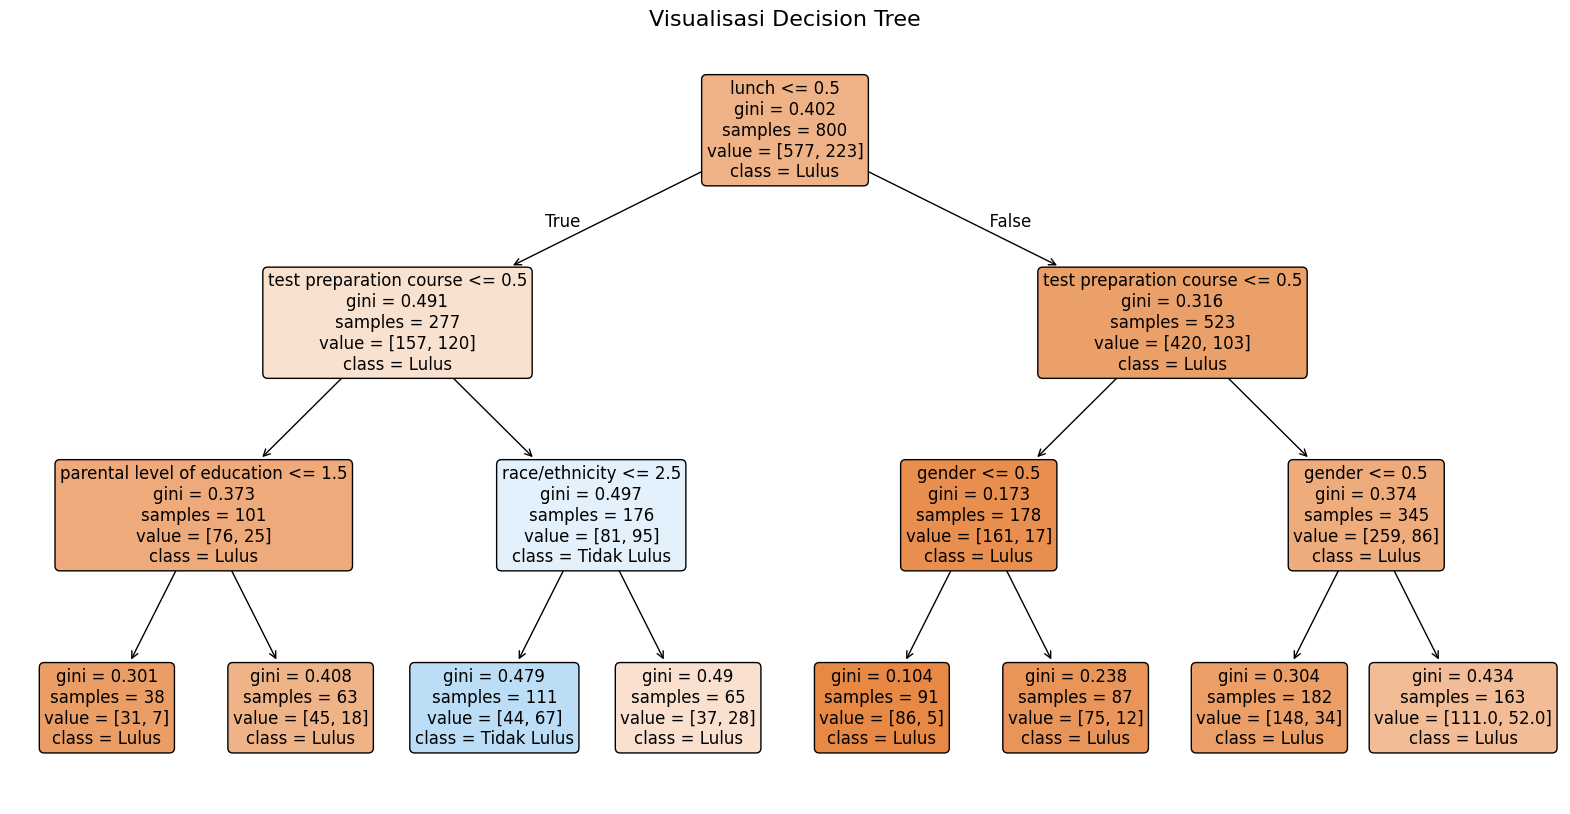

In [18]:
# Buat Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=le_target.classes_.tolist(),
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Visualisasi Decision Tree", fontsize=16)
plt.savefig("decision_tree_visualization.png")

# **KESIMPULAN**

Dapat disimpulkan bahwa model Decision Tree ini dapat memprediksi kelulusan siswa, faktor yang paling berpengaruh terhadap kelulusan adalah latar belakang sosial ekonomi (dapat dilihat dari status makan siang yang diterima siswa). Faktor lain seperti tingkat pendidikan orangtua, etnis, dan jenis kelamin juga cukup memengaruhi walaupun tidak sebesar faktor sosial ekonomi. Namun, hal ini dapat dikurangi dengan mengikuti program persiapan ujian.